In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df = pd.read_csv('kyphosis.csv')

The data has 81 rows and 4 columns which represents records on patients who have had corrective spinal surgery. The dataset is in a comma separate value (csv) format. Due to the small sample size of the data, we used all the data representing 100% for the training.
The features of the data represent 3 inputs and 1 output, where:

    Age: in months
    Number: the number of vertebrae involved
    Start: the number of the first (topmost) vertebrae operated on.

Output
Kyphosis: a factor with levels absent or present indicating if a kyphosis (a type of deformation) was present after the operation or surgery.

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


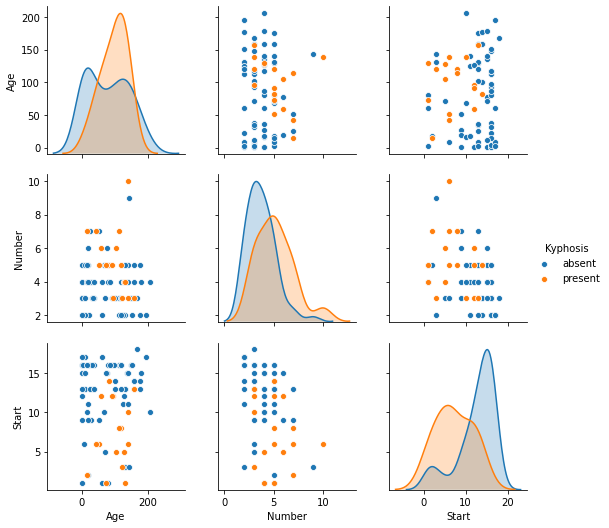

In [5]:
sns.pairplot(df,hue='Kyphosis')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

## Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier(random_state=40,min_samples_leaf=2)

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [12]:
dtree.score(X_test,y_test)

0.8

In [13]:
dtree.score(X_train,y_train)

0.9285714285714286

In [14]:
predictions = dtree.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25



In [17]:
print(confusion_matrix(y_test,predictions))

[[19  0]
 [ 5  1]]


In [18]:
############################################
# 1. before printing, create a df_train to have X_train and y_train
# 2. whats the shape?
# 3. what are the classes of the dtree (which one is 0 and which one is "1")

In [19]:
df_train = pd.concat([X_train, y_train], axis=1)

In [20]:
df_train.head()

,Age,Number,Start,Kyphosis
62,81,4,1,absent
42,143,9,3,absent
54,140,4,15,absent
16,78,6,15,absent
39,91,5,12,present


In [21]:
df_train.shape

(56, 4)

In [22]:
dtree.classes_

array(['absent', 'present'], dtype=object)

In [23]:
####################################################
# copy from the forum the plot tree command

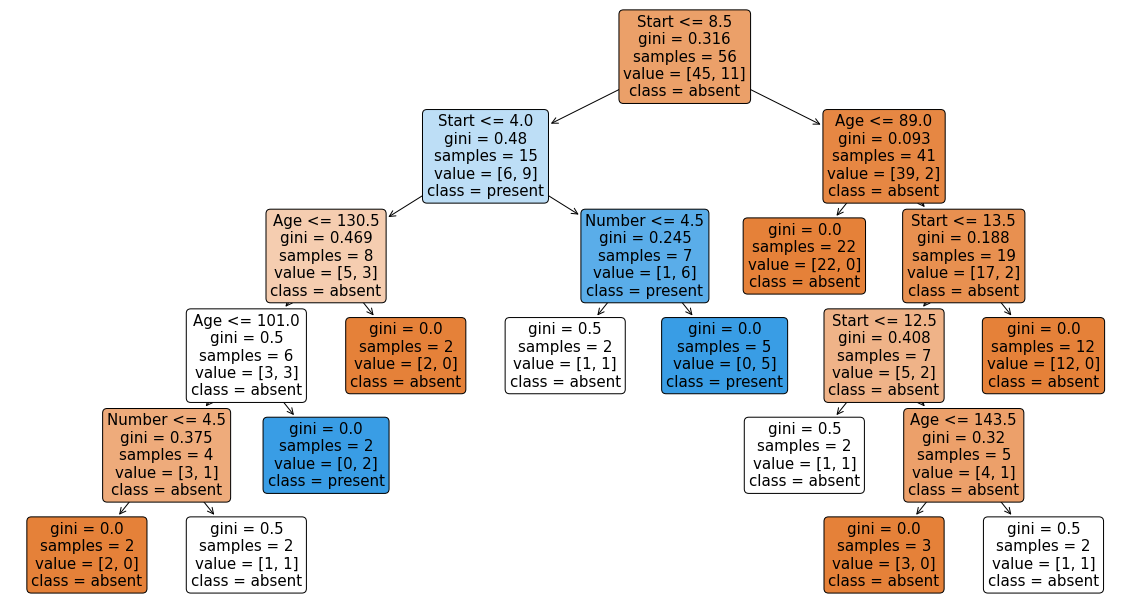

In [24]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,11))
a = plot_tree(dtree, 
              feature_names=X.columns, 
              class_names=dtree.classes_, 
              filled=True, 
              rounded=True, 
              fontsize=15)

In [25]:
##############################
# value = [45, 11] -> 45 for class 0 and 11 for class 1
# make sure the root node is correct, i.e. we have 45 absent and 11 present
# calculate gini for that node
# Gini = 1-p0^2 - p1^2

In [26]:
df_train.Kyphosis.value_counts()

absent     45
present    11
Name: Kyphosis, dtype: int64

In [27]:
df_train[df_train.Kyphosis=="present"].shape[0]

11

In [28]:
len(df_train[df_train.Kyphosis=="present"])

11

In [29]:
len(df_train[df_train.Kyphosis=="absent"])

45

In [30]:
1 - (45/56)**2 - (11/56)**2

0.315688775510204

In [31]:
############################################
# what the information gain after the first split?

In [32]:
upper_G = 1 - (45/56)**2 - (11/56)**2
upper_G

0.315688775510204

In [33]:
lower_G = 0.48*15/56 + 0.093*41/56
lower_G

0.19666071428571427

In [34]:

IG = upper_G - lower_G

In [35]:
IG

0.11902806122448975

In [36]:
##############################
# lets go the left node (yes <= 8.5)
# verify indeed we have 15 samples and 9 of them are "present"
# calc gini for that node
# calc the gini of left bottom leaf
# what is IG of the split led to it (has gini 0.375)?
# in that node, of gini=0.375, we predict the data to be absent. 
#        what is the probability for that?
# probability of being absent, if we reach the bottom right leaf

In [37]:
df_train[df_train.Start <= 8.5].shape

(15, 4)

In [38]:
df_train[df_train.Start <= 8.5]['Kyphosis'].value_counts()

present    9
absent     6
Name: Kyphosis, dtype: int64

In [39]:
df_train[(df_train.Start <= 8.5) & (df_train.Kyphosis == "present")].shape[0]

9

In [40]:
1 - (6/15)**2 - (9/15)**2

0.48

In [41]:
1 - (2/2)**2 - (0/2)**2

0.0

In [42]:
ug = 0.375
lg = 0*2/4 + 0.5*2/4


In [43]:
lg

0.25

In [44]:
IG = ug - lg
IG

0.125

In [45]:
prob_ab = 3/4
prob_ab

0.75

In [46]:
prob_ab = 1/2
prob_ab

0.5

In [47]:
########################
# try with min samples = 1, did we reached gini=0 in all leaves?

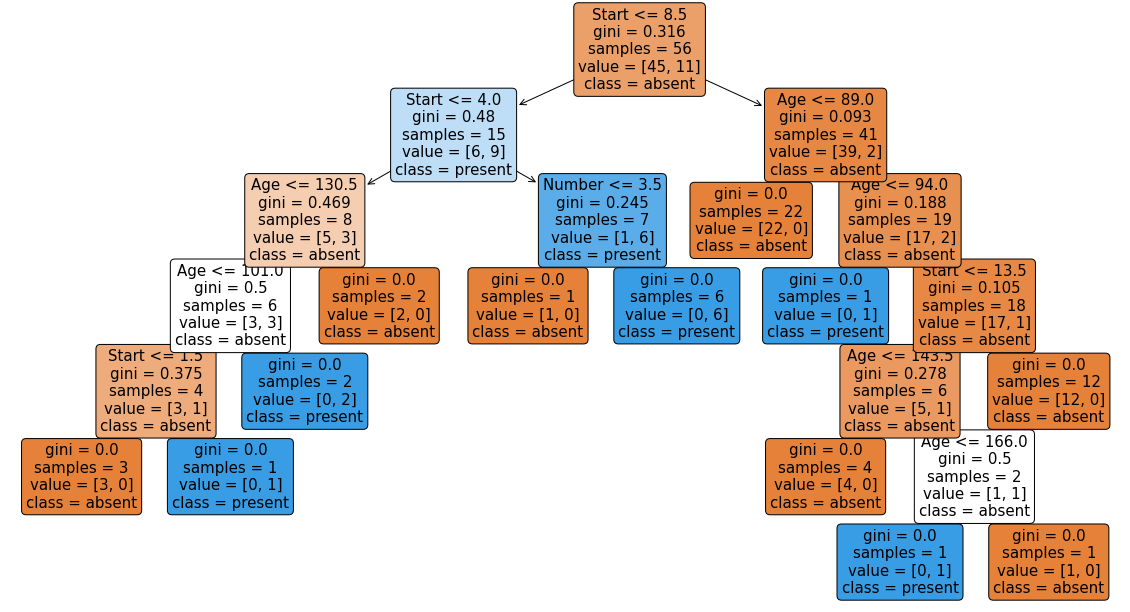

In [48]:
dtree = DecisionTreeClassifier(random_state=40,min_samples_leaf=1)
dtree.fit(X_train, y_train)
plt.figure(figsize=(20,11))
a = plot_tree(dtree, 
              feature_names=X.columns, 
              class_names=dtree.classes_, 
              filled=True, 
              rounded=True, 
              fontsize=15)

In [49]:
dtree.score(X_train, y_train)

1.0

In [50]:
dtree.score(X_test, y_test)

0.68

In [51]:
########################
# try with min samples leaf = 20, and max_Depth=2, what can we say about the classification?

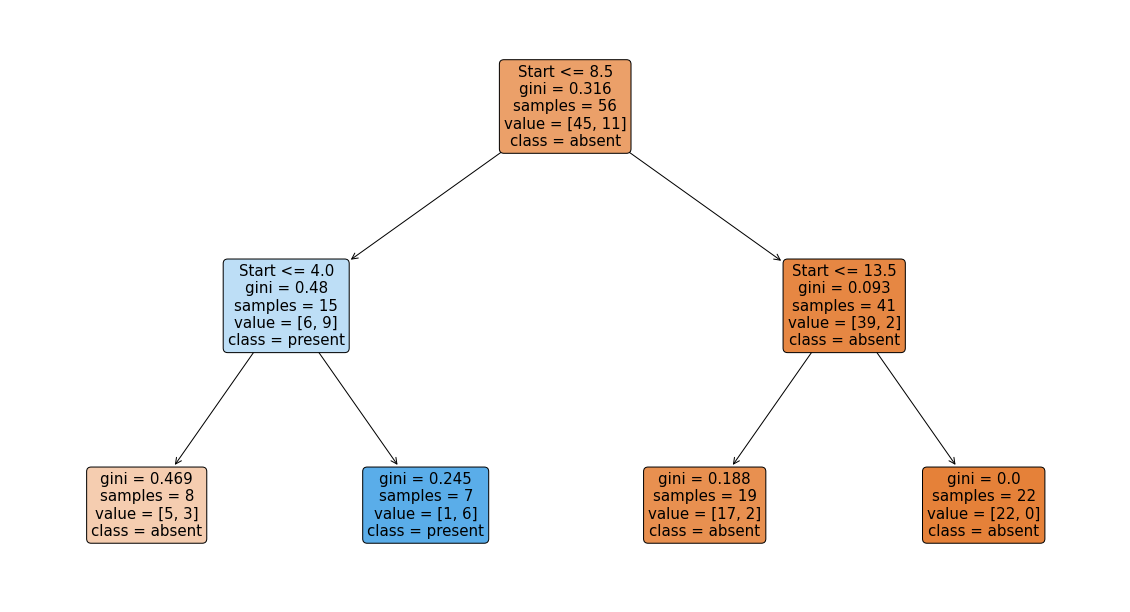

In [52]:
dtree = DecisionTreeClassifier(random_state=40, max_depth=2)
dtree.fit(X_train, y_train)
plt.figure(figsize=(20,11))
a = plot_tree(dtree, 
              feature_names=X.columns, 
              class_names=dtree.classes_, 
              filled=True, 
              rounded=True, 
              fontsize=15)

In [53]:
##########################################################################
# train a DT with the "rain" dataset from class and plot tree it to compare
# if it's different, look at the parameter needed to be changed so it would be the same

In [54]:
X_train2 = pd.DataFrame( data= {'x1' : [1,1,0,0,1,1], 'x2' : [1,0,1,1,1,0]     }   )

In [55]:
y_train2 = pd.DataFrame( data = {'y' : ["1", "1", "1", "1", "0", "0"  ]}   ).y

In [56]:
y_train2

0    1
1    1
2    1
3    1
4    0
5    0
Name: y, dtype: object

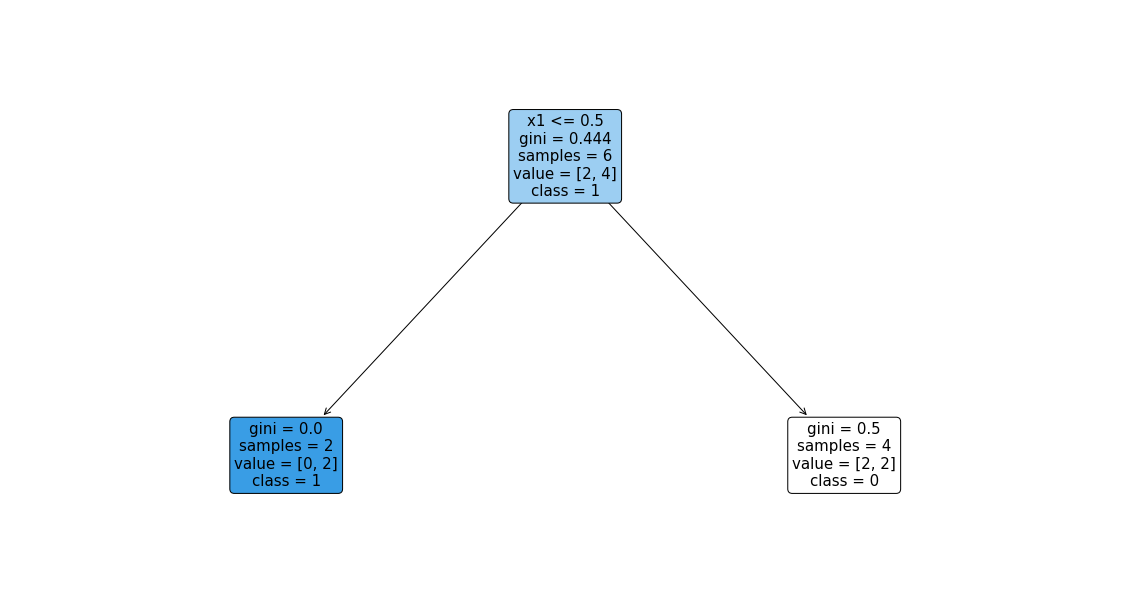

In [57]:
dtree = DecisionTreeClassifier(random_state=40, min_impurity_decrease=0.000001)
dtree.fit(X_train2, y_train2)
plt.figure(figsize=(20,11))
a = plot_tree(dtree, 
              feature_names=X_train2.columns, 
              class_names=dtree.classes_, 
              filled=True, 
              rounded=True, 
              fontsize=15)